In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

In [2]:
train_df = pd.read_csv('../input/twitter-sentiment-analysis/Corona_NLP (2).csv', encoding='latin-1')
test_df = pd.read_csv('../input/twitter-sentiment-analysis/Corona_NLP (2).csv', encoding='latin-1')

In [3]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
train_inputs = train_df['OriginalTweet'].copy()
test_inputs = test_df['OriginalTweet'].copy()

train_labels = train_df['Sentiment'].copy()
test_labels = test_df['Sentiment'].copy()

In [7]:
sentiment_encoding = {
    'Extremely Negative': 0,
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
    'Extremely Positive': 2
}

train_labels = train_labels.replace(sentiment_encoding)
test_labels = test_labels.replace(sentiment_encoding)

In [8]:
train_inputs

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [9]:
stop_words = stopwords.words('english')

def process_tweet(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>', ' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+', ' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+', ' ', tweet)
    
    # remove mentions
    tweet = re.sub(r'@\w+', ' ', tweet)
    
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return tweet

# Function taken from @Shahraiz's wonderful notebook

In [10]:
train_inputs = train_inputs.apply(process_tweet)
test_inputs = test_inputs.apply(process_tweet)

In [11]:
train_inputs

0                                                         
1        advice Talk neighbours family exchange phone n...
2        Coronavirus Australia: Woolworths give elderly...
3        My food stock one empty... PLEASE, panic, THER...
4        Me, ready go supermarket outbreak. Not I'm par...
                               ...                        
41152    Airline pilots offering stock supermarket shel...
41153    Response complaint provided citing COVID- rela...
41154    You know itÂs getting tough rationing toilet ...
41155      Is wrong smell hand sanitizer starting turn on?
41156    Well new/used Rift S going $ . Amazon rn altho...
Name: OriginalTweet, Length: 41157, dtype: object

In [12]:
max_seq_length = np.max(train_inputs.apply(lambda tweet: len(tweet)))

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_inputs)

vocab_length = len(tokenizer.word_index) + 1


train_inputs = tokenizer.texts_to_sequences(train_inputs)
test_inputs = tokenizer.texts_to_sequences(test_inputs)

train_inputs = pad_sequences(train_inputs, maxlen=max_seq_length, padding='post')
test_inputs = pad_sequences(test_inputs, maxlen=max_seq_length, padding='post')

In [14]:
print("Vocab length:", vocab_length)
print("Max sequence length:", max_seq_length)

Vocab length: 36117
Max sequence length: 286


In [15]:
train_inputs.shape

(41157, 286)

2022-05-12 18:17:15.206292: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 286)]             0         
_________________________________________________________________
word_embedding (Embedding)   (None, 286, 16)           577872    
_________________________________________________________________
bidirectional_layer (Bidirec (None, 286, 512)          420864    
_________________________________________________________________
max_pooling (GlobalMaxPoolin (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0     

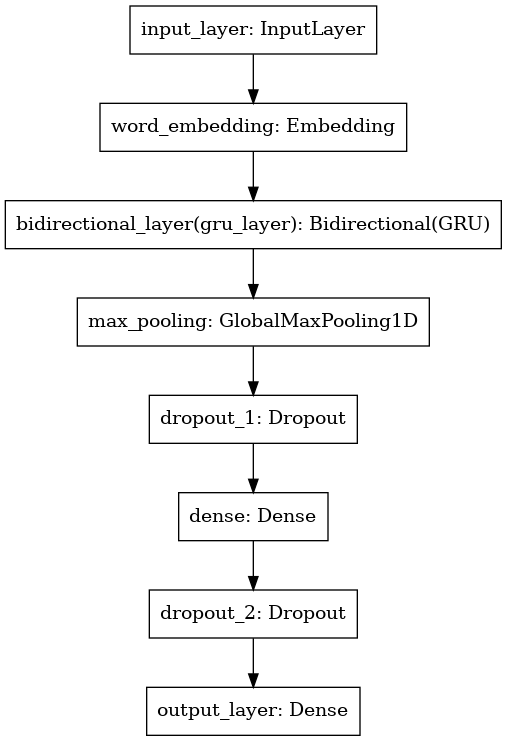

In [16]:
embedding_dim = 16


inputs = tf.keras.Input(shape=(max_seq_length,), name='input_layer')

embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    input_length=max_seq_length,
    name='word_embedding'
)(inputs)

gru_layer = tf.keras.layers.Bidirectional(
    tf.keras.layers.GRU(units=256, return_sequences=True, name='gru_layer'),
    name='bidirectional_layer'
)(embedding)

max_pooling = tf.keras.layers.GlobalMaxPool1D(name='max_pooling')(gru_layer)

dropout_1 = tf.keras.layers.Dropout(0.4, name='dropout_1')(max_pooling)

dense = tf.keras.layers.Dense(64, activation='relu', name='dense')(dropout_1)

dropout_2 = tf.keras.layers.Dropout(0.4, name='dropout_2')(dense)

outputs = tf.keras.layers.Dense(3, activation='softmax', name='output_layer')(dropout_2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

tf.keras.utils.plot_model(model)

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 2

history = model.fit(
    train_inputs,
    train_labels,
    validation_split=0.12,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2
)

2022-05-12 18:17:17.423850: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
1132/1132 - 1338s - loss: 0.6482 - accuracy: 0.7214 - val_loss: 0.3987 - val_accuracy: 0.8623
Epoch 2/2
1132/1132 - 1274s - loss: 0.3331 - accuracy: 0.8910 - val_loss: 0.3641 - val_accuracy: 0.8706


In [18]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "epoch", 'value': "loss"}
)

fig.show()

In [19]:
model.evaluate(test_inputs, test_labels)

1287/1287 [==============================] - 428s 332ms/step - loss: 0.2235 - accuracy: 0.9317


[0.22352410852909088, 0.9316519498825073]